<a href="https://colab.research.google.com/github/MUFTIALCHAIRI/Praktikum-2/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub
diabetes_prediction_dataset_path = kagglehub.dataset_download('iammustafatz/diabetes-prediction-dataset')
# Print the actual download path
print(f"Dataset downloaded to: {diabetes_prediction_dataset_path}")

Dataset downloaded to: /root/.cache/kagglehub/datasets/iammustafatz/diabetes-prediction-dataset/versions/1


In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
# Menampilkan pesan error
import warnings
warnings.filterwarnings('ignore')

# Mengimport library yang kita perlukan
import numpy as np
import pandas as pd

# Import Visualisasi library
import matplotlib.pyplot as plt
import seaborn as sns

#Import libraries Model
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Import Sampler libraries
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import InstanceHardnessThreshold

# Set nilai format decimal
pd.options.display.float_format = "{:.2f}".format

# **Load Data**

In [ ]:
df = pd.read_csv("/content/diabetes_prediction_dataset.csv")

In [ ]:
# Menampilkan dataset
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.00,0,1,never,25.19,6.60,140,0
1,Female,54.00,0,0,No Info,27.32,6.60,80,0
2,Male,28.00,0,0,never,27.32,5.70,158,0
3,Female,36.00,0,0,current,23.45,5.00,155,0
4,Male,76.00,1,1,current,20.14,4.80,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.00,0,0,No Info,27.32,6.20,90,0
99996,Female,2.00,0,0,No Info,17.37,6.50,100,0
99997,Male,66.00,0,0,former,27.83,5.70,155,0
99998,Female,24.00,0,0,never,35.42,4.00,100,0


# **Exploring Dataset**

In [ ]:
#Exploring the dataset by different methods
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
#Check the columns in dataset
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [ ]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00
mean,41.89,0.07,0.04,27.32,5.53,138.06,0.09
std,22.52,0.26,0.19,6.64,1.07,40.71,0.28
min,0.08,0.00,0.00,10.01,3.50,80.00,0.00
25%,24.00,0.00,0.00,23.63,4.80,100.00,0.00
50%,43.00,0.00,0.00,27.32,5.80,140.00,0.00
75%,60.00,0.00,0.00,29.58,6.20,159.00,0.00
max,80.00,1.00,1.00,95.69,9.00,300.00,1.00


In [ ]:
#shape define the columns and rows of dataset
df.shape

(100000, 9)

In [ ]:
df.size

900000

# **Cleaning Data**

In [ ]:
#checking for null values
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [ ]:
#checking for duplicate values
df.duplicated().sum()

3854

In [ ]:
df = df.drop_duplicates()

In [ ]:
#checking for duplicate values
df.duplicated().sum()

0

# **Exploratory Data Analysis (EDA)**

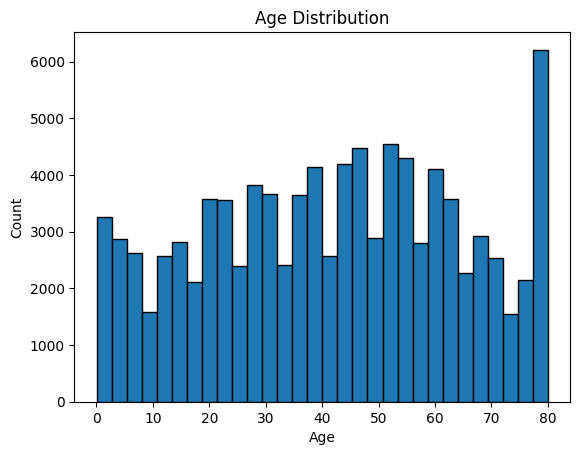

In [ ]:
# Histogram for age
plt.hist(df['age'], bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

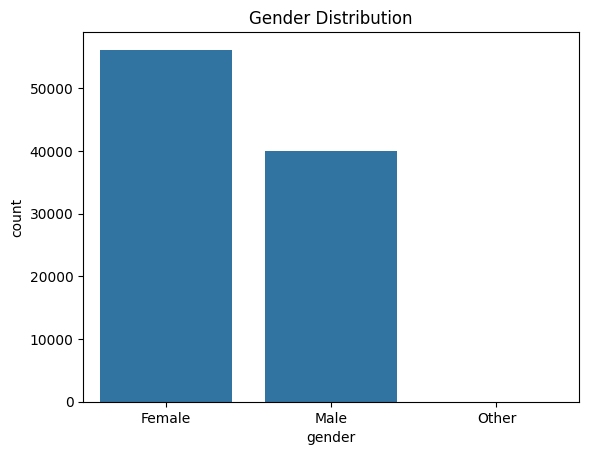

In [ ]:
# Bar plot for gender
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()

In [ ]:
count_survival_classes = df['gender'].value_counts()
print("Counts for each class in 'survived':")
print(count_survival_classes)

Counts for each class in 'survived':
gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64


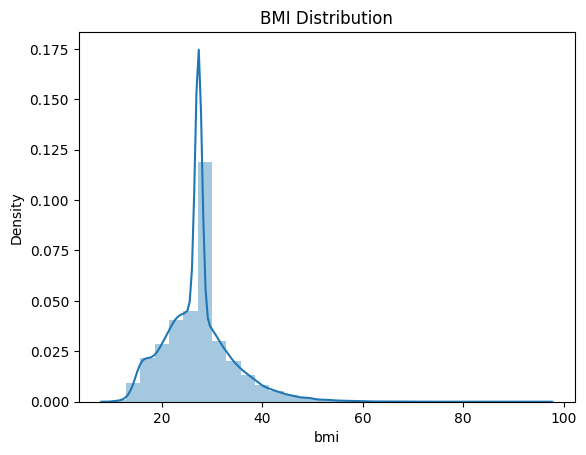

In [ ]:
# Distribution plot for BMI
sns.distplot(df['bmi'], bins=30)
plt.title('BMI Distribution')
plt.show()

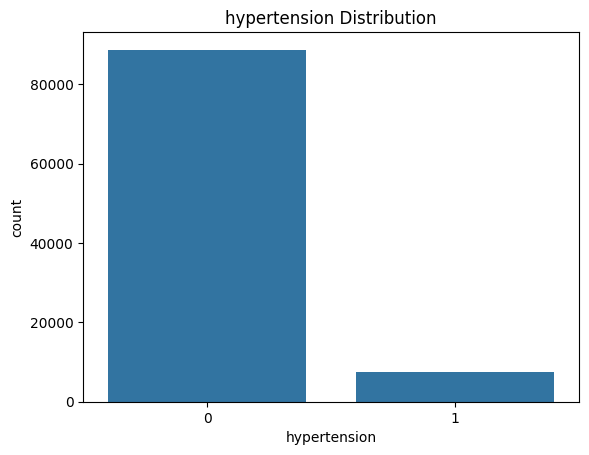

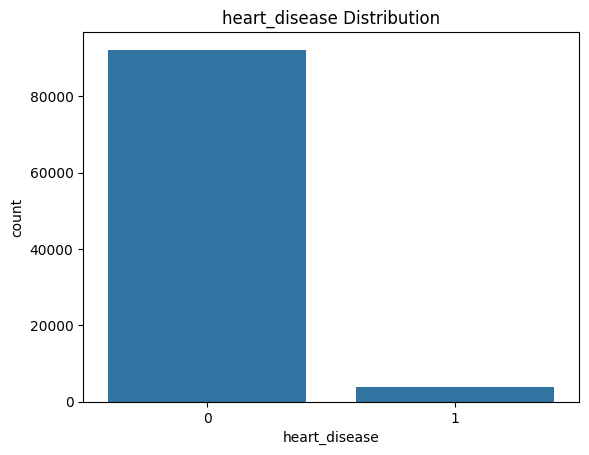

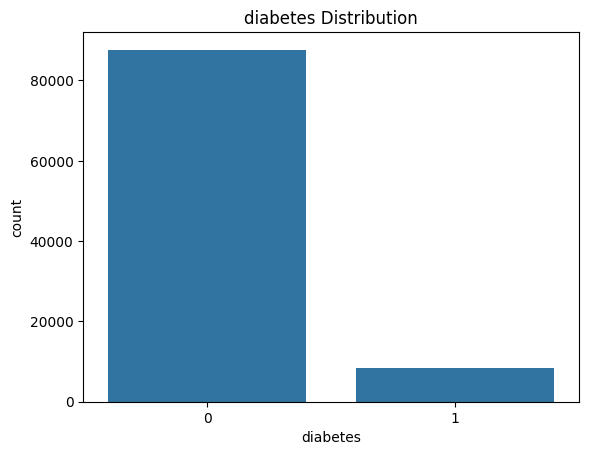

In [ ]:
# Count plots for binary variables
for col in ['hypertension', 'heart_disease', 'diabetes']:
    sns.countplot(x=col, data=df)
    plt.title(f'{col} Distribution')
    plt.show()

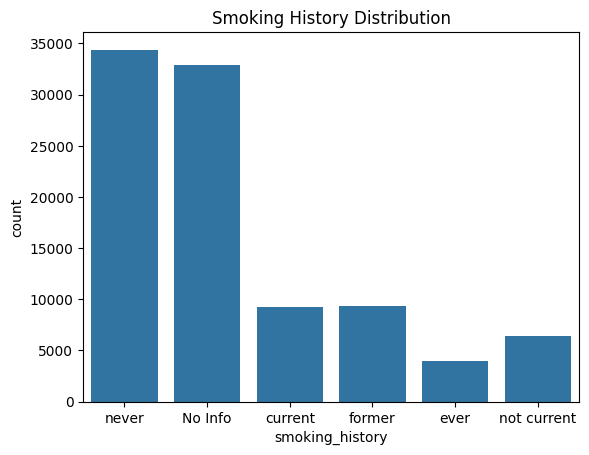

In [ ]:
# Count plot for smoking history
sns.countplot(x='smoking_history', data=df)
plt.title('Smoking History Distribution')
plt.show()

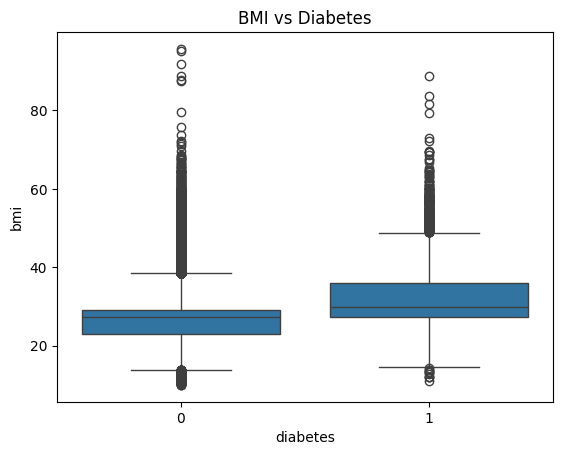

In [ ]:
# Boxplot BMI vs Diabetes classification
sns.boxplot(x='diabetes', y='bmi', data=df)
plt.title('BMI vs Diabetes')
plt.show()

Titik-titik di luar kumis mewakili outlier. Outlier adalah nilai yang terletak pada titik ekstrim suatu rangkaian data sehingga dapat mempengaruhi pengamatan secara keseluruhan. Pencilan juga disebut ekstrem karena terletak di kedua ujung data. Outlier adalah nilai yang berada di luar (1,5*kisaran interkuartil) dari persentil 25 atau 75.

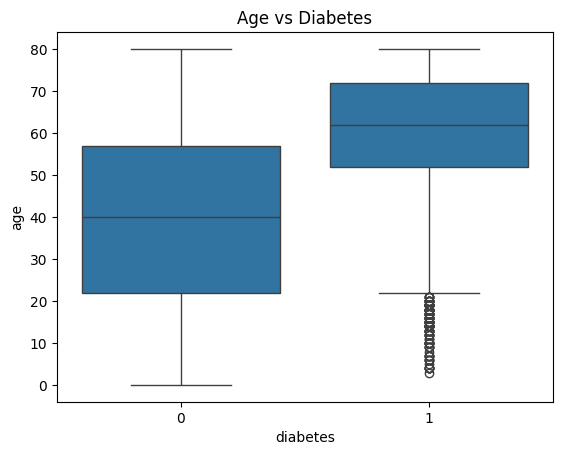

In [ ]:
# Boxplot Age vs Diabetes classification
sns.boxplot(x='diabetes', y='age', data=df)
plt.title('Age vs Diabetes')
plt.show()

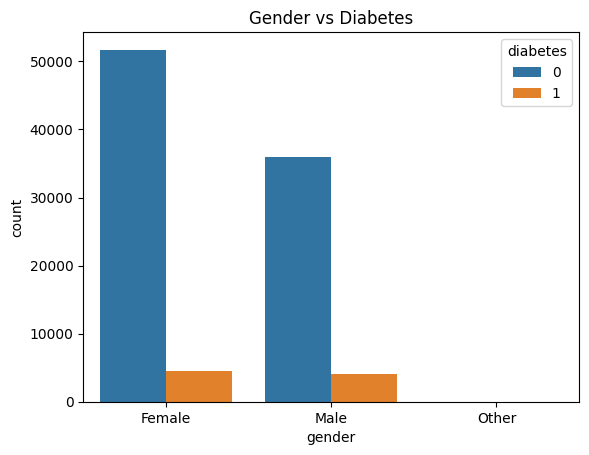

In [ ]:
# Count plot of gender vs diabetes
sns.countplot(x='gender', hue='diabetes', data=df)
plt.title('Gender vs Diabetes')
plt.show()

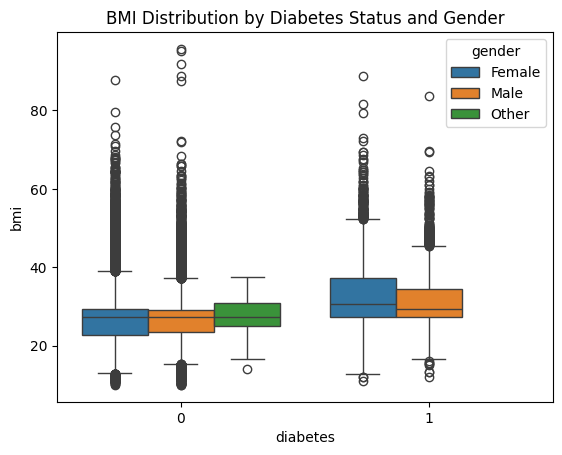

In [ ]:
# Interaction between gender, BMI and diabetes
sns.boxplot(x='diabetes', y='bmi', hue='gender', data=df)
plt.title('BMI Distribution by Diabetes Status and Gender')
plt.show()

# **Preprocessing**

In [ ]:
# Define a function to map the existing categories to new ones
def recategorize_smoking(smoking_status):
    if smoking_status in ['never', 'No Info']:
        return 'non-smoker'
    elif smoking_status == 'current':
        return 'current'
    elif smoking_status in ['ever', 'former', 'not current']:
        return 'past_smoker'

# Apply the function to the 'smoking_history' column
df['smoking_history'] = df['smoking_history'].apply(recategorize_smoking)

# Check the new value counts
print(df['smoking_history'].value_counts())

smoking_history
non-smoker     67285
past_smoker    19664
current         9197
Name: count, dtype: int64


In [ ]:
# Check the new value counts
print(df['diabetes'].value_counts())

diabetes
0    87664
1     8482
Name: count, dtype: int64


In [ ]:
df.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.00,0,1,non-smoker,25.19,6.60,140,0
1,Female,54.00,0,0,non-smoker,27.32,6.60,80,0
2,Male,28.00,0,0,non-smoker,27.32,5.70,158,0
3,Female,36.00,0,0,current,23.45,5.00,155,0
4,Male,76.00,1,1,current,20.14,4.80,155,0
5,Female,20.00,0,0,non-smoker,27.32,6.60,85,0
6,Female,44.00,0,0,non-smoker,19.31,6.50,200,1
7,Female,79.00,0,0,non-smoker,23.86,5.70,85,0
8,Male,42.00,0,0,non-smoker,33.64,4.80,145,0
9,Female,32.00,0,0,non-smoker,27.32,5.00,100,0


In [ ]:
# Initialize the label encoder
le = LabelEncoder()

# Apply label encoding to the 'gender' column
df['gender'] = le.fit_transform(df['gender'])

# Verify the encoding
print(df['gender'].unique())


[0 1 2]


In [ ]:
# Define the custom mapping
smoking_mapping = {
    'non-smoker': 0,
    'past_smoker': 1,
    'current': 2
}

# Apply the mapping
df['smoking_history'] = df['smoking_history'].map(smoking_mapping)

In [ ]:
df.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.00,0,1,0,25.19,6.60,140,0
1,0,54.00,0,0,0,27.32,6.60,80,0
2,1,28.00,0,0,0,27.32,5.70,158,0
3,0,36.00,0,0,2,23.45,5.00,155,0
4,1,76.00,1,1,2,20.14,4.80,155,0
5,0,20.00,0,0,0,27.32,6.60,85,0
6,0,44.00,0,0,0,19.31,6.50,200,1
7,0,79.00,0,0,0,23.86,5.70,85,0
8,1,42.00,0,0,0,33.64,4.80,145,0
9,0,32.00,0,0,0,27.32,5.00,100,0


In [ ]:
# Initialize scaler
scaler = StandardScaler()

# Apply scaling to numerical features
numerical_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
df[numerical_features] = scaler.fit_transform(df[numerical_features])


In [ ]:
df.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,1.70,0,1,0,-0.31,0.99,0.04,0
1,0,0.54,0,0,0,-0.00,0.99,-1.42,0
2,1,-0.61,0,0,0,-0.00,0.16,0.48,0
3,0,-0.26,0,0,2,-0.57,-0.50,0.41,0
4,1,1.52,1,1,2,-1.06,-0.68,0.41,0
5,0,-0.97,0,0,0,-0.00,0.99,-1.30,0
6,0,0.10,0,0,0,-1.18,0.90,1.51,1
7,0,1.66,0,0,0,-0.51,0.16,-1.30,0
8,1,0.01,0,0,0,0.93,-0.68,0.17,0
9,0,-0.44,0,0,0,-0.00,-0.50,-0.93,0


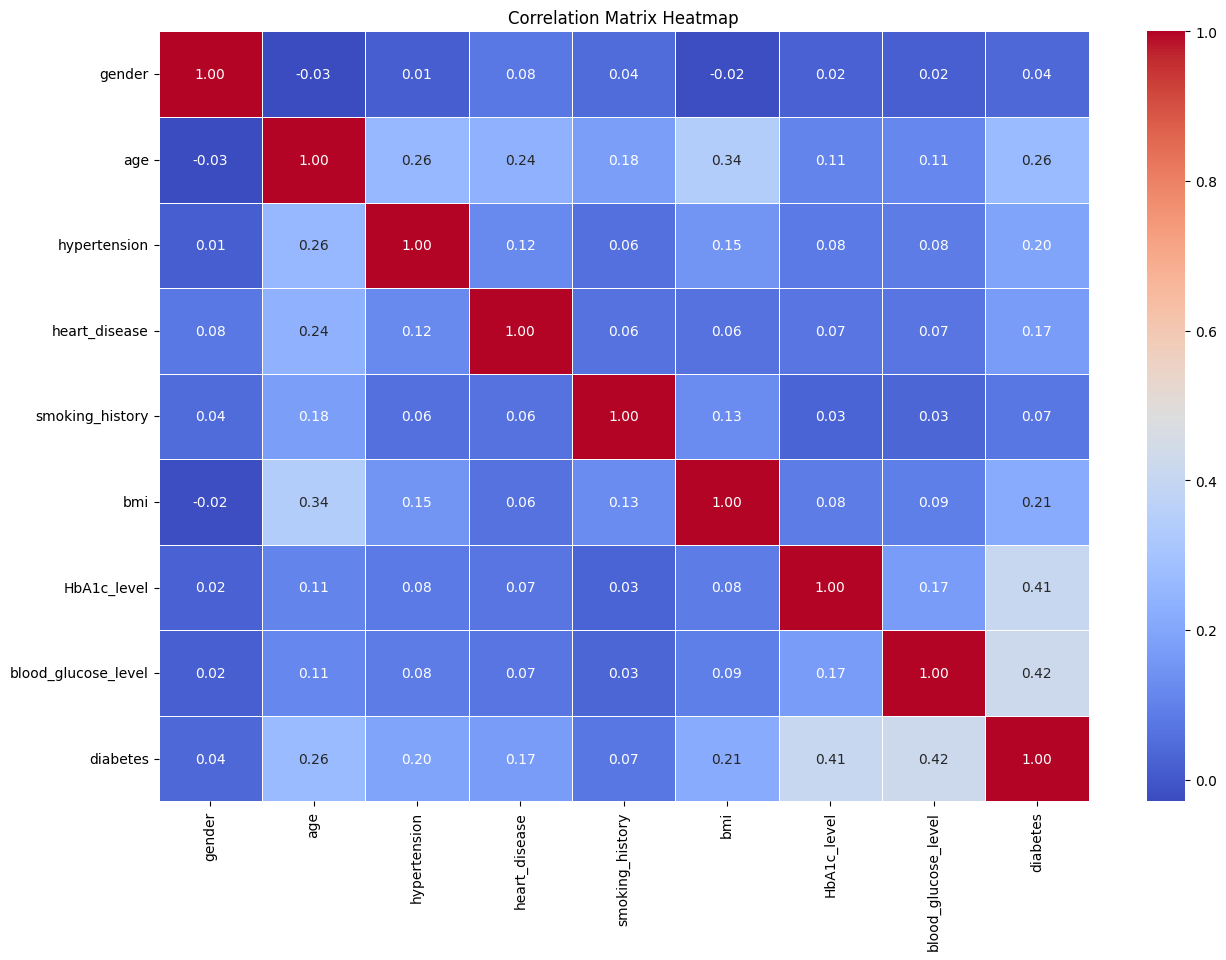

In [ ]:
# correlation matrix
correlation_matrix = df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

# **Extract Fitur**

In [ ]:
# Seleksi Fitur dengan RFE
from sklearn.feature_selection import RFE

# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Inisialisasi RFE dengan 5 fitur terbaik
rfe = RFE(estimator=rf_model, n_features_to_select=5)

# Pisahkan fitur (X) dan target (y)
X = df.drop('diabetes', axis=1)  # df adalah DataFrame Anda setelah Extract Fitur
y = df['diabetes']

# Fit RFE pada data
rfe.fit(X, y)

# Dapatkan fitur-fitur terpilih
selected_features = X.columns[rfe.support_]

# Buat DataFrame baru hanya dengan fitur terpilih
df_selected = df[selected_features.tolist() + ['diabetes']]  # Sertakan kolom target

# Cetak fitur-fitur terpilih
print("Fitur Terpilih:", selected_features)

Fitur Terpilih: Index(['age', 'hypertension', 'bmi', 'HbA1c_level', 'blood_glucose_level'], dtype='object')


# **Training and Testing Model**

Random Forest Accuracy: 0.9679667186687467

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     17509
           1       0.94      0.68      0.79      1721

    accuracy                           0.97     19230
   macro avg       0.96      0.84      0.89     19230
weighted avg       0.97      0.97      0.97     19230



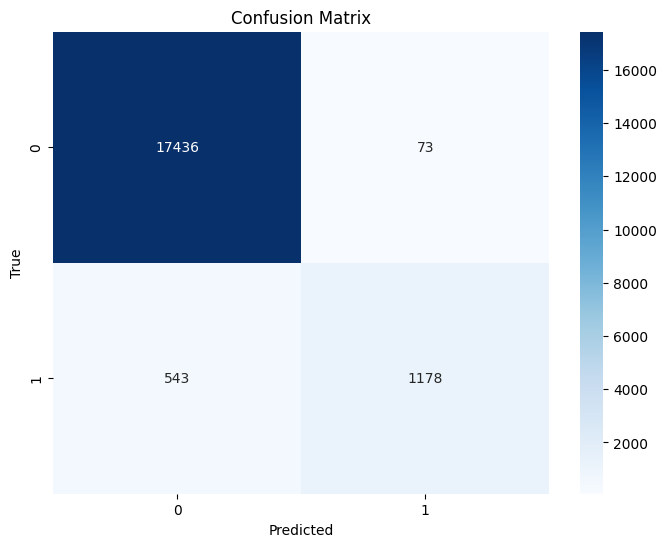

In [ ]:
# Split data into features and target variable
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# **Meningkatkan performa model dengan menggunakan Smote (Synthetic Minority Oversampling Technique)**

Random Forest Accuracy with SMOTE: 0.9568902756110245

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     17509
           1       0.77      0.75      0.76      1721

    accuracy                           0.96     19230
   macro avg       0.87      0.86      0.87     19230
weighted avg       0.96      0.96      0.96     19230



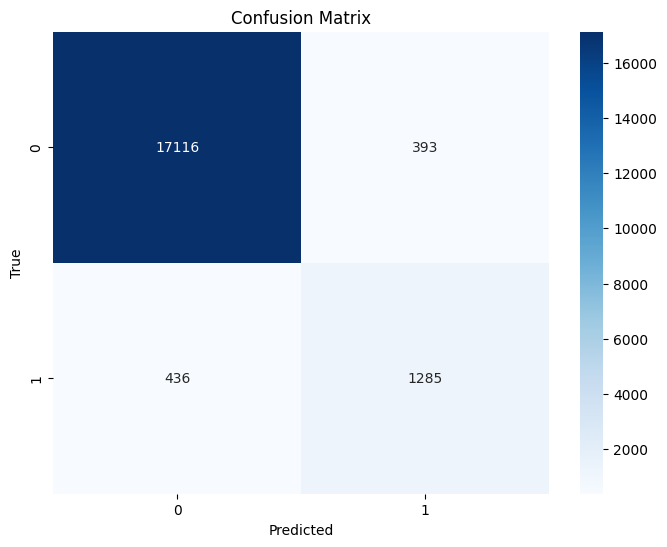

In [ ]:
# Apply SMOTE to balance the training set
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Train the model on the SMOTE-balanced data
rf_model.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy with SMOTE:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



Training Random Forest...
Random Forest Accuracy: 0.9568902756110245

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     17509
           1       0.77      0.75      0.76      1721

    accuracy                           0.96     19230
   macro avg       0.87      0.86      0.87     19230
weighted avg       0.96      0.96      0.96     19230



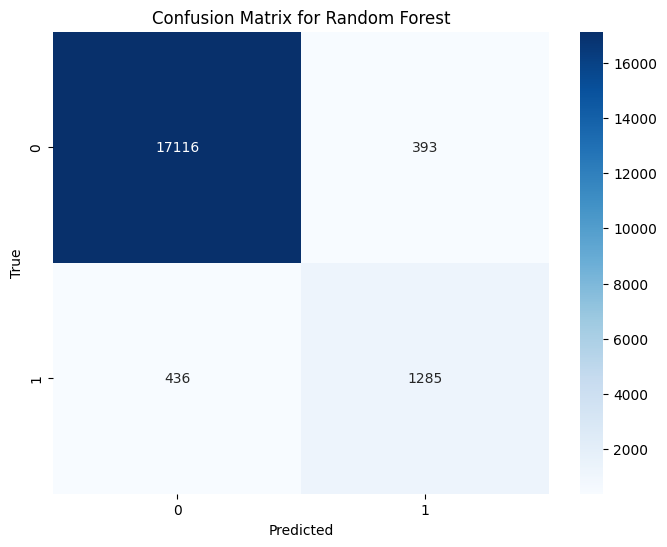

In [ ]:
# Initialize models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy}")
    print(f"\nClassification Report for {model_name}:\n", classification_report(y_test, y_pred))

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


# **Under Sampling Model**

mengurangi jumlah instance kelas mayoritas agar sesuai dengan ukuran kelas minoritas, yang dapat membantu mengurangi kompleksitas komputasi namun mungkin juga kehilangan informasi berguna.

Training Random Forest...

Random Forest Accuracy: 0.8773270930837234

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.87      0.93     17509
           1       0.42      0.94      0.58      1721

    accuracy                           0.88     19230
   macro avg       0.71      0.90      0.75     19230
weighted avg       0.94      0.88      0.90     19230



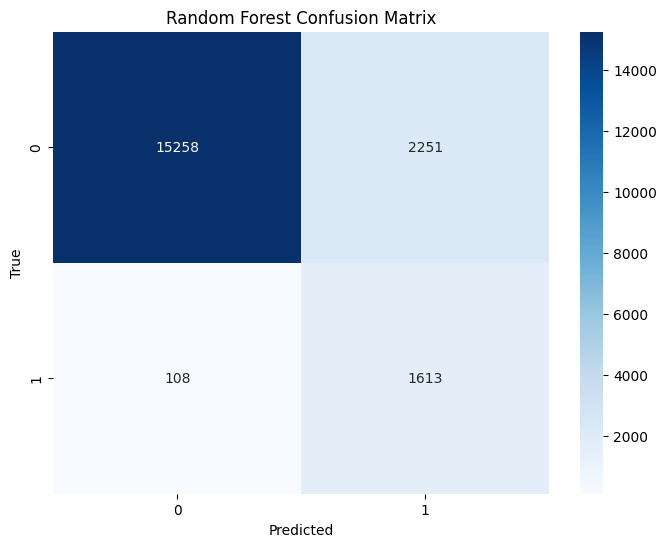

In [ ]:
# Use InstanceHardnessThreshold for balancing the training set
iht = InstanceHardnessThreshold(estimator=RandomForestClassifier(random_state=42))
X_train_iht, y_train_iht = iht.fit_resample(X_train, y_train)

# Define models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train_iht, y_train_iht)  # Train on the IHT-balanced data
    y_pred = model.predict(X_test)  # Predict on the test set

    # Evaluate
    print(f"\n{model_name} Accuracy:", accuracy_score(y_test, y_pred))
    print(f"\n{model_name} Classification Report:\n", classification_report(y_test, y_pred))

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


# **Final Evaluation**

* bagi menjadi pelatihan (60%), validasi (20%), dan pengujian 20%
* Penyelesaian akhir Parameter model

Training set size: (57687, 8) (57687,)
Validation set size: (19229, 8) (19229,)
Test set size: (19230, 8) (19230,)
After SMOTE - Training set size: (105260, 8) (105260,)
Training Random Forest...
Random Forest Validation Accuracy: 0.9547038327526133

Random Forest Validation Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98     17481
           1       0.76      0.74      0.75      1748

    accuracy                           0.95     19229
   macro avg       0.87      0.86      0.86     19229
weighted avg       0.95      0.95      0.95     19229

Random Forest Test Accuracy: 0.9570982839313572

Random Forest Test Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     17553
           1       0.76      0.75      0.75      1677

    accuracy                           0.96     19230
   macro avg       0.87      0.86      0.86     19230
weighted 

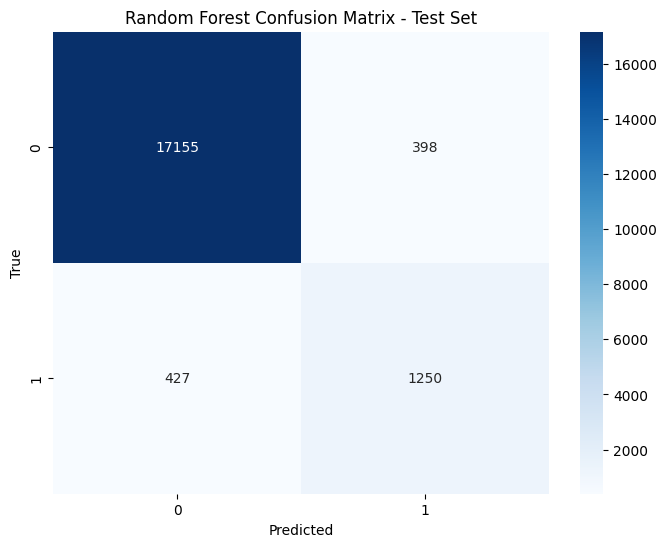

In [ ]:
# Split into training (60%), validation (20%), and test (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training set size:", X_train.shape, y_train.shape)
print("Validation set size:", X_val.shape, y_val.shape)
print("Test set size:", X_test.shape, y_test.shape)

# Apply SMOTE to balance the training set
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("After SMOTE - Training set size:", X_train_smote.shape, y_train_smote.shape)

# Define models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=500, random_state=42, class_weight='balanced')
}

# Train and evaluate models
for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Train on the SMOTE-balanced data
    model.fit(X_train_smote, y_train_smote)

    # Validate on the validation set
    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    print(f"{model_name} Validation Accuracy:", val_accuracy)
    print(f"\n{model_name} Validation Classification Report:\n", classification_report(y_val, y_val_pred))

    # Predict on the test set
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"{model_name} Test Accuracy:", test_accuracy)
    print(f"\n{model_name} Test Classification Report:\n", classification_report(y_test, y_test_pred))

    # Plot confusion matrix for test set
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix - Test Set')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Hasil Interpretasi

Model Random Forest ini yang telah di-tuning dan di-SMOTE menunjukkan performa yang sangat baik dalam memprediksi diabetes. Akurasi model mencapai 96%, yang berarti 96% dari total prediksi benar. Lebih detail, precision untuk kelas 'tidak diabetes' adalah 98%, menunjukkan bahwa dari semua yang diprediksi tidak diabetes, 98% benar. Precision untuk kelas 'diabetes' adalah 90%, yang berarti 90% dari prediksi diabetes benar. Recall, yang mengukur kemampuan model mengidentifikasi instance positif sebenarnya, juga tinggi. Recall untuk 'tidak diabetes' adalah 96%, dan untuk 'diabetes' adalah 93%. Ini berarti model berhasil mengidentifikasi sebagian besar instance diabetes dan tidak diabetes dengan benar. F1-score, yang menyeimbangkan precision dan recall, juga menunjukkan hasil yang baik, dengan 97% untuk 'tidak diabetes' dan 91% untuk 'diabetes'.